# 야후 파이낸스로 주식시세 구하기
  ### 야후 파이낸스에서 제공하는 삼성전자와 마이크로소프트 주식 시세를 데이터프레임으로 받아 분석
   * 야후 파이낸스는 pip install yfinance로 설치
   * 팬더스-데이터리더 라이브러리 pip installpandas-datareader로 설치
   * 주식 시세를 구하기 위해서는 get_data_yahoo() 함수 사용
    - get_data_yahoo(조회할 주식,start=조회기간시작일, end=조회기간의 종료일)
    - 조회할 주식은 문자열이나, 리스트
    - 조회 기간은 생략할 수 있다.
    - 코스피종목을 조회하려면 6자리 종목코드 뒤에 .KS  
    - 코스닥종목을 조회하려면 종목코드 뒤에 .KQ
    - 미국기업 주식종목을 조회하려면 심볼(티커)를 사용하여 조회한다. 

In [1]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt

In [2]:
sec = pdr.get_data_yahoo('005930.KS',start='2019-01-01')  # 삼성주식
msft = pdr.get_data_yahoo('MSFT',start='2019-01-01') # 마이크로 소프트 주식

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
sec.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,39400.0,39400.0,38550.0,38750.0,38750.0,7847664
2019-01-03,38300.0,38550.0,37450.0,37600.0,37600.0,12471493
2019-01-04,37450.0,37600.0,36850.0,37450.0,37450.0,14108958
2019-01-07,38000.0,38900.0,37800.0,38750.0,38750.0,12748997
2019-01-08,38000.0,39200.0,37950.0,38100.0,38100.0,12756554


In [4]:
msft.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,101.290001,102.400002,100.440002,101.570000,99.300156,33173800
2019-01-02,99.550003,101.750000,98.940002,101.120003,98.860214,35329300
2019-01-03,100.099998,100.190002,97.199997,97.400002,95.223351,42579100
2019-01-04,99.720001,102.510002,98.930000,101.930000,99.652115,44060600
2019-01-07,101.639999,103.269997,100.980003,102.059998,99.779205,35656100


##### 변수설명
* Open : 시가. 매일 열리는 주식 시장의 첫 시작 가격
* High : 고가. 가장 높은 금액으로 거래
* Low : 저가. 가장 낮은 금액으로 거래
* Close : 종가. 하루 열린 장에서 가장 마지막으로 거래가 완료된 가격을 종가
* Adj Close : 수정종가. 주식가격에 변동이 있을 경우 가격 변동 이전에 거래된 가격을 현재 주식에 맞춰 수정하여 표시한 가격
* Volume : 거래량. 매매된 주식의 수량

In [5]:
sec.index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2020-09-16', '2020-09-17', '2020-09-18', '2020-09-21',
               '2020-09-22', '2020-09-23', '2020-09-24', '2020-09-25',
               '2020-09-28', '2020-09-29'],
              dtype='datetime64[ns]', name='Date', length=432, freq=None)

In [6]:
msft.index

DatetimeIndex(['2018-12-31', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14',
               ...
               '2020-09-21', '2020-09-22', '2020-09-23', '2020-09-24',
               '2020-09-25', '2020-09-28', '2020-09-29', '2020-09-30',
               '2020-10-01', '2020-10-02'],
              dtype='datetime64[ns]', name='Date', length=444, freq=None)

* 삼성전자(sec)와 마이크로소프트(msft)는 인덱스가 dataime형으로 되어 있다. 

In [7]:
sec.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

### 삼성전자와 마이크로소프트 종가 데이터를 이용한 그래프 

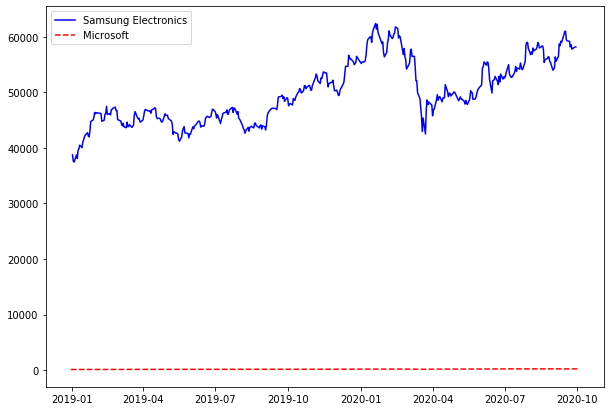

In [8]:
plt.figure(figsize=(10,7))
plt.plot(sec.index,sec['Close'],'b',label='Samsung Electronics')
plt.plot(msft.index,msft.Close,'r--',label='Microsoft')
plt.legend(loc='best')
plt.show()

##### 그래프설명
 - 삼성전자는 50000원 대 , 마이크로소프트는 130달러 대의 주가이기 때문에 숫자 차이가 커서 마이크로소프트 주가가 0인것 처럼 보인다.
 - 비교가 어렵기 때문에 일간변동률을 이용해 비교해 본다.
<br/>
<br/>


##### 코드 설명
* x 축에는 인덱스(날짜), y축에는 Close(종가)데이터.
* plt.legend(loc='best')   ->  라벨 표가 적당히 빈 자리에 위치

### 일간변동률로 삼성전자와 마이크로소프트 주가 비교하기

일간 변동률 = (오늘종가-어제종가)/어제종가 *100

In [9]:
sec['Close']

Date
2019-01-02    38750.0
2019-01-03    37600.0
2019-01-04    37450.0
2019-01-07    38750.0
2019-01-08    38100.0
               ...   
2020-09-23    58600.0
2020-09-24    57800.0
2020-09-25    57900.0
2020-09-28    58200.0
2020-09-29    58200.0
Name: Close, Length: 432, dtype: float64

In [10]:
sec['Close'].shift(1)

Date
2019-01-02        NaN
2019-01-03    38750.0
2019-01-04    37600.0
2019-01-07    37450.0
2019-01-08    38750.0
               ...   
2020-09-23    58200.0
2020-09-24    58600.0
2020-09-25    57800.0
2020-09-28    57900.0
2020-09-29    58200.0
Name: Close, Length: 432, dtype: float64

* shift는 데이터를 이동시킬 떄 사용하는 함수이다.  
* shift(?)  ->  ?만큼 이동시킨다. 
* 한 칸씩 밀려서 1월2일자 주식정보가 1월3일로 들어가 있다. 그 말은 1월 3일 입장에서는 어제 날짜의 주식정보가 들어가 있는 것이다.
* 즉, shift를 이용해서 해당날짜의 어제 주식정보를 들어가게 입력해 주었다. 

#### 일간변동률 코드

In [11]:
sec_dpc = (sec['Close']-sec['Close'].shift(1))/sec['Close'].shift(1)*100   # 삼성

In [12]:
msft_dpc = (msft['Close']-msft['Close'].shift(1))/msft['Close'].shift(1)*100  # 마이크로소프트

In [13]:
sec_dpc

Date
2019-01-02         NaN
2019-01-03   -2.967742
2019-01-04   -0.398936
2019-01-07    3.471295
2019-01-08   -1.677419
                ...   
2020-09-23    0.687285
2020-09-24   -1.365188
2020-09-25    0.173010
2020-09-28    0.518135
2020-09-29    0.000000
Name: Close, Length: 432, dtype: float64

###### NaN값을 0으로 바꾼다.

In [14]:
sec_dpc.iloc[0] = 0 
sec_dpc

Date
2019-01-02    0.000000
2019-01-03   -2.967742
2019-01-04   -0.398936
2019-01-07    3.471295
2019-01-08   -1.677419
                ...   
2020-09-23    0.687285
2020-09-24   -1.365188
2020-09-25    0.173010
2020-09-28    0.518135
2020-09-29    0.000000
Name: Close, Length: 432, dtype: float64

In [15]:
msft_dpc.iloc[0] = 0 
msft_dpc

Date
2018-12-31    0.000000
2019-01-02   -0.443041
2019-01-03   -3.678799
2019-01-04    4.650923
2019-01-07    0.127536
                ...   
2020-09-28    0.779518
2020-09-29   -1.040875
2020-09-30    1.481235
2020-10-01    1.012697
2020-10-02   -2.951146
Name: Close, Length: 444, dtype: float64

###### 그래프그리기

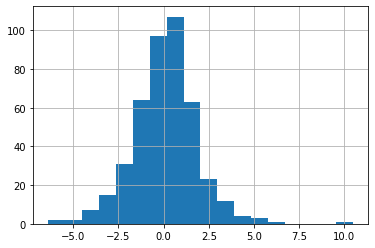

In [16]:
plt.hist(sec_dpc,bins=18)
plt.grid(True)
plt.show()

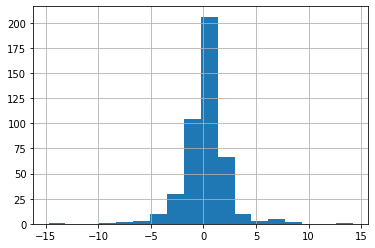

In [17]:
plt.hist(msft_dpc,bins=18)
plt.grid(True)
plt.show()

#### 일간변동률 누적합 
* sec_dpc와 msft_dpc 는 일간변동률이다. 하지만 전체적인 변동룰의 비교해보려면 일간변동률의 누적합이 필요하다. 
* cumsum() 함수를 이용해 누적합을 구한다.

In [18]:
sec_dpc_sum = sec_dpc.cumsum()
msft_dpc_sum = msft_dpc.cumsum()

In [19]:
sec_dpc_sum

Date
2019-01-02     0.000000
2019-01-03    -2.967742
2019-01-04    -3.366678
2019-01-07     0.104617
2019-01-08    -1.572802
                ...    
2020-09-23    48.430333
2020-09-24    47.065145
2020-09-25    47.238155
2020-09-28    47.756290
2020-09-29    47.756290
Name: Close, Length: 432, dtype: float64

In [20]:
msft_dpc_sum

Date
2018-12-31     0.000000
2019-01-02    -0.443041
2019-01-03    -4.121840
2019-01-04     0.529083
2019-01-07     0.656619
                ...    
2020-09-28    83.173746
2020-09-29    82.132871
2020-09-30    83.614106
2020-10-01    84.626803
2020-10-02    81.675657
Name: Close, Length: 444, dtype: float64

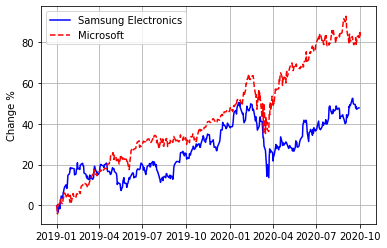

In [21]:
plt.plot(sec.index,sec_dpc_sum,'b',label='Samsung Electronics')
plt.plot(msft.index,msft_dpc_sum,'r--',label='Microsoft')
plt.ylabel('Change %')
plt.grid(True)
plt.legend(loc='best')
plt.show()

# MDD(Maximum Drawdown) 최대 손실낙폭
* 최대손실낙폭은 특정기간에 발생한 최고점에서 최저점까지의 가장 큰 손실을 의미. 
* 퀀트 투자에서는 수익률을 높이는 것보다 MDD를 낮추는 것이 더 낫다고 할 만큼 중요한 지표이다. 
* MDD에서는 rolling()함수가 중요하다!!!
   - 사용법 : 시리즈.rolling(윈도우,min_periods=1).집계합수()
   - rolling의 시리즈에서 윈도우 크기에 해당하는 갯수만큼 데이터를 추출하여 집계함수에 해당하는 연산을 한다.
   - 집계합수는 max,min,mean 등을 사용할 수 있다.
   

In [24]:
kospi = pdr.get_data_yahoo('^KS11','2004-01-04')    # ^KS11은 코스피지수를 의미

[*********************100%***********************]  1 of 1 completed


In [25]:
kospi

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-01-05,817.280029,825.429993,816.549988,824.099976,824.099976,408200
2004-01-06,831.260010,831.260010,819.530029,823.429993,823.429993,484000
2004-01-07,826.080017,831.070007,825.229980,827.070007,827.070007,404600
2004-01-08,831.099976,839.280029,824.150024,824.150024,824.150024,428800
2004-01-09,835.419983,849.500000,835.049988,845.270020,845.270020,543200
...,...,...,...,...,...,...
2020-09-23,2352.560059,2354.459961,2287.439941,2333.239990,2333.239990,735000
2020-09-24,2295.620117,2309.739990,2268.879883,2272.699951,2272.699951,714900
2020-09-25,2295.189941,2296.360107,2267.629883,2278.790039,2278.790039,698000


In [29]:
window = 252   # 1년동안의 주식 개장일을 약 252로 선정했다. 

peak = kospi['Adj Close'].rolling(window,min_periods=1).max() # 코스피종가컬럼에서 최고치 peak을 구한다.

drawdown = kospi['Adj Close']/peak-1  # 최고치 대비 현재 kospi종가가 얼마나 하락했는지 구한다.

max_dd = drawdown.rolling(window,min_periods=1).min()  # 최저치구하기. 여기서 최저치가 최대낙폭손실이 된다. 

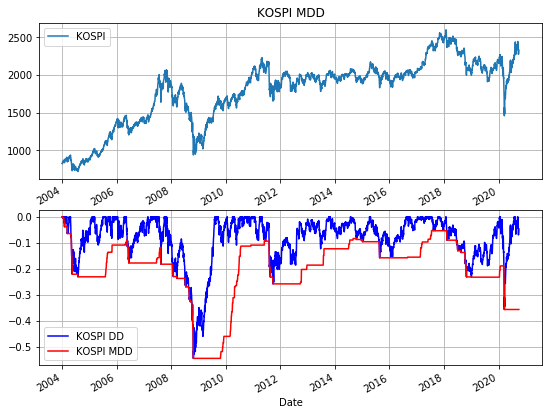

In [33]:
plt.figure(figsize=(9,7))
plt.subplot(211)  # 2행1열 중 1행에 그린다. 
kospi['Close'].plot(label = 'KOSPI', title = 'KOSPI MDD', grid =True, legend=True)

plt.subplot(212)  # 2행1열 중 2행에 그린다. 
drawdown.plot(c='blue', label = 'KOSPI DD', grid=True,legend=True)
max_dd.plot(c='red', label = 'KOSPI MDD', grid=True, legend=True)
plt.show()

In [34]:
max_dd.min()

-0.5453665130144085

- 2008년 10월 금융위기 장시 KOSPI지수가 하락하면서 MDD가 약 -54.5%를 기록했다. 정확한 수치는 위와 같다.
<br/>
<br/>

- MDD를 기록한 구간을 구하기 위해 아래과 같이 적용.
    * 2008년 10월 24일부터 2009년 10월 21일까지 약 1년간 주어진 max_dd 수치와 일치한 것을 확인할 수 있다.

In [35]:
max_dd[max_dd==-0.5453665130144085]

Date
2008-10-24   -0.545367
2008-10-27   -0.545367
2008-10-28   -0.545367
2008-10-29   -0.545367
2008-10-30   -0.545367
                ...   
2009-10-16   -0.545367
2009-10-19   -0.545367
2009-10-20   -0.545367
2009-10-21   -0.545367
2009-10-22   -0.545367
Name: Adj Close, Length: 252, dtype: float64

# KOSPI와 다우존스 지수비교
* 국내주식과 미국주식의 상관관계를 비교하기 위해 야후 파이낸스로 부터 2000년 1월부터 현재까지 KOSPI와 다우존스 지수 데이터를 불러온다.

In [38]:
dow = pdr.get_data_yahoo('^DJI','2000-01-04')
kospi = pdr.get_data_yahoo('^KS11','2000-01-04')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


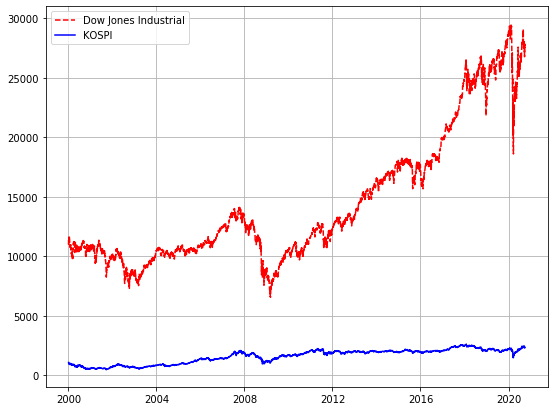

In [41]:
plt.figure(figsize=(9,7))
plt.plot(dow.index,dow.Close,'r--',label='Dow Jones Industrial')
plt.plot(kospi.index,kospi['Close'],'b',label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

* 일반종가로는 지수수치 차이가 많이나서 그래프를 해석하기 힘들다. 
* 현재종가를 특정시점 종가로 나누어 변동률을 구해보자. (지수화 이용)

#### 지수화 비교

In [42]:
d = (dow.Close/dow.Close.loc['2000-01-04'])*100
k = (kospi.Close/kospi.Close.loc['2000-01-04'])*100

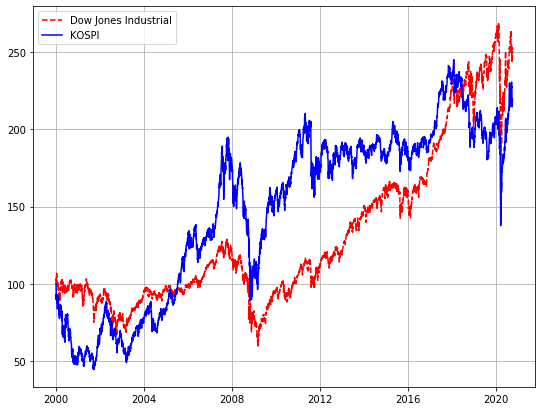

In [43]:
plt.figure(figsize=(9,7))
plt.plot(d.index,d,'r--',label='Dow Jones Industrial')
plt.plot(k.index,k,'b',label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

* 종가(dow[Close])를 2000년 1월 4일 종가로 나눈 뒤 100을 곱하면 2000년 1월4일 종가대비 해당 날짜의 변동률을 구할 수 있다. 
* 이런것을 '지수화'라고 한다. 
<br/>
<br/>
* 지수화를 하고 나니 20년간 KOSPI상승률과 다우존스지수의 상승률이 비슷하다는 것을 알 수 있다.


In [46]:
dow['Close']/dow.Close.loc['2000-01-04']

Date
2000-01-03    1.032695
2000-01-04    1.000000
2000-01-05    1.011340
2000-01-06    1.023216
2000-01-07    1.047703
                ...   
2020-09-28    2.508114
2020-09-29    2.496166
2020-09-30    2.526084
2020-10-01    2.529285
2020-10-02    2.517093
Name: Close, Length: 5222, dtype: float64

In [ ]:
import pandas as pd
import pymysql
from datetime import datetime
from datetime import timedelta
import re

class MarketDB:
    def __init__(self):
        """생성자: MariaDB 연결 및 종목코드 딕셔너리 생성"""
        self.conn = pymysql.connect(host='localhost', user='root', 
            password='snake.land.', db='INVESTAR', charset='utf8')
        self.codes = {}
        self.get_comp_info()
        
    def __del__(self):
        """소멸자: MariaDB 연결 해제"""
        self.conn.close()

    def get_comp_info(self):
        """company_info 테이블에서 읽어와서 codes에 저장"""
        sql = "SELECT * FROM company_info"
        krx = pd.read_sql(sql, self.conn)
        for idx in range(len(krx)):
            self.codes[krx['code'].values[idx]] = krx['company'].values[idx]

    def get_daily_price(self, code, start_date=None, end_date=None):
        """KRX 종목의 일별 시세를 데이터프레임 형태로 반환
            - code       : KRX 종목코드('005930') 또는 상장기업명('삼성전자')
            - start_date : 조회 시작일('2020-01-01'), 미입력 시 1년 전 오늘
            - end_date   : 조회 종료일('2020-12-31'), 미입력 시 오늘 날짜
        """
        if start_date is None:
            one_year_ago = datetime.today() - timedelta(days=365)
            start_date = one_year_ago.strftime('%Y-%m-%d')
            print("start_date is initialized to '{}'".format(start_date))
        else:
            start_lst = re.split('\D+', start_date)
            if start_lst[0] == '':
                start_lst = start_lst[1:]
            start_year = int(start_lst[0])
            start_month = int(start_lst[1])
            start_day = int(start_lst[2])
            if start_year < 1900 or start_year > 2200:
                print(f"ValueError: start_year({start_year:d}) is wrong.")
                return
            if start_month < 1 or start_month > 12:
                print(f"ValueError: start_month({start_month:d}) is wrong.")
                return
            if start_day < 1 or start_day > 31:
                print(f"ValueError: start_day({start_day:d}) is wrong.")
                return
            start_date=f"{start_year:04d}-{start_month:02d}-{start_day:02d}"

        if end_date is None:
            end_date = datetime.today().strftime('%Y-%m-%d')
            print("end_date is initialized to '{}'".format(end_date))
        else:
            end_lst = re.split('\D+', end_date)
            if end_lst[0] == '':
                end_lst = end_lst[1:] 
            end_year = int(end_lst[0])
            end_month = int(end_lst[1])
            end_day = int(end_lst[2])
            if end_year < 1800 or end_year > 2200:
                print(f"ValueError: end_year({end_year:d}) is wrong.")
                return
            if end_month < 1 or end_month > 12:
                print(f"ValueError: end_month({end_month:d}) is wrong.")
                return
            if end_day < 1 or end_day > 31:
                print(f"ValueError: end_day({end_day:d}) is wrong.")
                return
            end_date = f"{end_year:04d}-{end_month:02d}-{end_day:02d}"
         
        codes_keys = list(self.codes.keys())
        codes_values = list(self.codes.values())

        if code in codes_keys:
            pass
        elif code in codes_values:
            idx = codes_values.index(code)
            code = codes_keys[idx]
        else:
            print(f"ValueError: Code({code}) doesn't exist.")
        sql = f"SELECT * FROM daily_price WHERE code = '{code}'"\
            f" and date >= '{start_date}' and date <= '{end_date}'"
        df = pd.read_sql(sql, self.conn)
        df.index = df['date']
        return df 

